<a href="https://colab.research.google.com/github/Sreelakshmiamenon/Machine-learning-projects/blob/main/19_Simple_vs_Polynomial_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_excel('/content/poly.xlsx')
df

,sno,Temperature,Pressure
0,1,0,0.0002
1,2,20,0.0012
2,3,40,0.0060
3,4,60,0.0300
4,5,80,0.0900
5,6,100,0.2700


In [ ]:
df.dtypes

sno              int64
Temperature      int64
Pressure       float64
dtype: object

In [ ]:
df.head()

,sno,Temperature,Pressure
0,1,0,0.0002
1,2,20,0.0012
2,3,40,0.0060
3,4,60,0.0300
4,5,80,0.0900


In [ ]:
df.tail()

,sno,Temperature,Pressure
1,2,20,0.0012
2,3,40,0.0060
3,4,60,0.0300
4,5,80,0.0900
5,6,100,0.2700


In [ ]:
df.isna().sum()

sno            0
Temperature    0
Pressure       0
dtype: int64

In [ ]:
df.columns

Index(['sno', 'Temperature', 'Pressure'], dtype='object')

In [ ]:
x=df.iloc[:,1:-1]
x

,Temperature
0,0
1,20
2,40
3,60
4,80
5,100


In [ ]:
y=df.iloc[:,-1]
y

0    0.0002
1    0.0012
2    0.0060
3    0.0300
4    0.0900
5    0.2700
Name: Pressure, dtype: float64

In [ ]:
x1=df['Temperature'].tolist()
x1

[0, 20, 40, 60, 80, 100]

In [ ]:
y1=df['Pressure'].tolist()
y1

[0.0002, 0.0012, 0.006, 0.03, 0.09, 0.27]

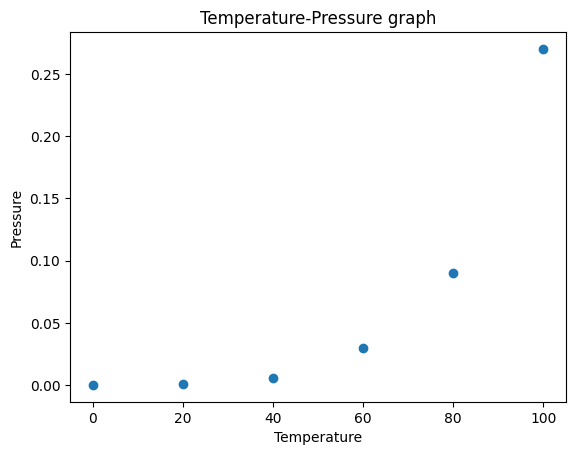

In [ ]:
#scatterplot
plt.scatter(x1,y1)
plt.title('Temperature-Pressure graph')
plt.xlabel('Temperature')
plt.ylabel('Pressure')
plt.show()

In [ ]:
x.ndim

2

In [ ]:
y.ndim

1

In [ ]:
#model creation
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x,y)
y_pred=model.predict(x)
y_pred

array([-0.05086667, -0.00402667,  0.04281333,  0.08965333,  0.13649333,
        0.18333333])

In [ ]:
y

0    0.0002
1    0.0012
2    0.0060
3    0.0300
4    0.0900
5    0.2700
Name: Pressure, dtype: float64

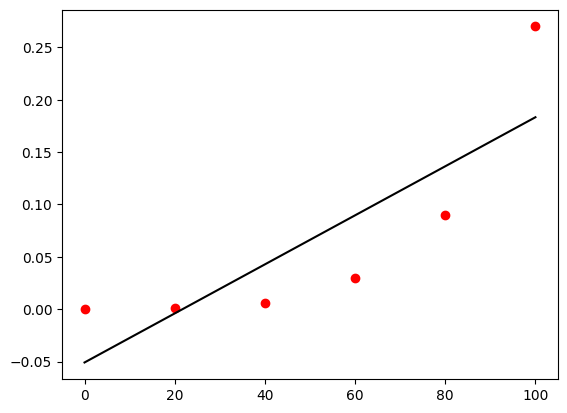

In [ ]:
#regression line plotting
plt.scatter(x,y,color='r')
plt.plot(x,y_pred,color='k')    #y=mx+c

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error       #MAPE
print("Percentage error is: ",mean_absolute_percentage_error(y,y_pred))

Percentage error is:  44.775078189300416


In [ ]:
from sklearn.metrics import r2_score          #R_2 score
print("R_2 score is: ",r2_score(y,y_pred))

R_2 score is:  0.690349972603981


In [ ]:
#IMPLEMENTATION OF POLYNOMIAL REGRESSION
from sklearn.preprocessing import PolynomialFeatures
x_poly=PolynomialFeatures(degree=3)
x_feature=x_poly.fit_transform(x)
x_feature

array([[1.00e+00, 0.00e+00, 0.00e+00, 0.00e+00],
       [1.00e+00, 2.00e+01, 4.00e+02, 8.00e+03],
       [1.00e+00, 4.00e+01, 1.60e+03, 6.40e+04],
       [1.00e+00, 6.00e+01, 3.60e+03, 2.16e+05],
       [1.00e+00, 8.00e+01, 6.40e+03, 5.12e+05],
       [1.00e+00, 1.00e+02, 1.00e+04, 1.00e+06]])

In [ ]:
model1=LinearRegression()
model1.fit(x_feature,y)
y_poly=model1.predict(x_feature)
y_poly

array([-0.00198889,  0.00724444,  0.00371111,  0.02248889,  0.09865556,
        0.26728889])

Text(0, 0.5, 'Pressure')

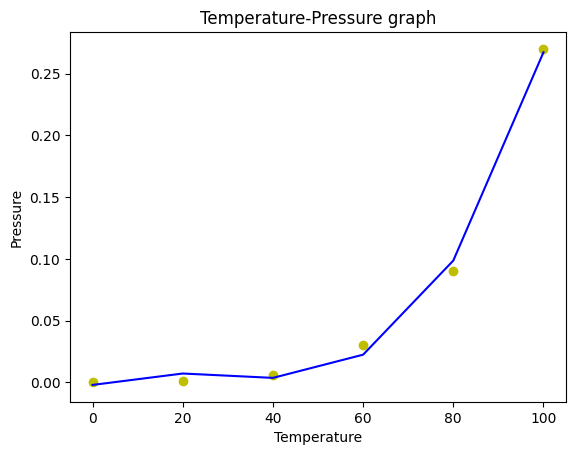

In [ ]:
#plotting the graph
plt.scatter(x,y,color='y')
plt.plot(x,y_poly,color='b')
plt.title('Temperature-Pressure graph')
plt.xlabel('Temperature')
plt.ylabel('Pressure')

In [ ]:
#MAPE and R_2 SCORE
from sklearn.metrics import mean_absolute_percentage_error,r2_score
print("Error is: ",mean_absolute_percentage_error(y,y_poly))
print("R_2 score is: ",r2_score(y,y_poly))

Error is:  2.7865912208923658
R_2 score is:  0.9966691251761722


In [ ]:
#Create a dataframe using actual value, value predicted using simple regression and polynomial regression
df1=pd.DataFrame({'Actual value':y,'Simple':y_pred,'Polynomial':y_poly})
df1

,Actual value,Simple,Polynomial
0,0.0002,-0.050867,-0.001989
1,0.0012,-0.004027,0.007244
2,0.0060,0.042813,0.003711
3,0.0300,0.089653,0.022489
4,0.0900,0.136493,0.098656
5,0.2700,0.183333,0.267289
